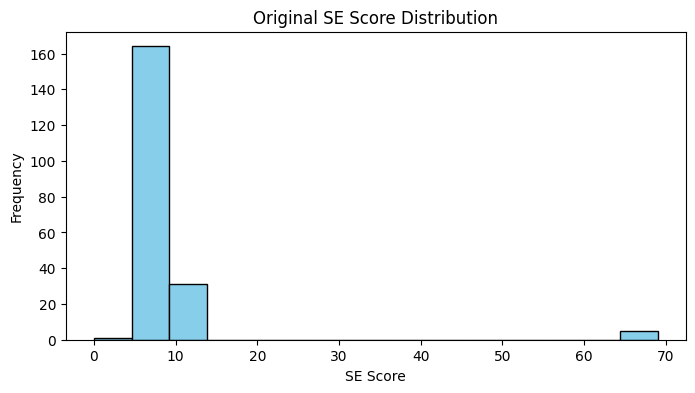

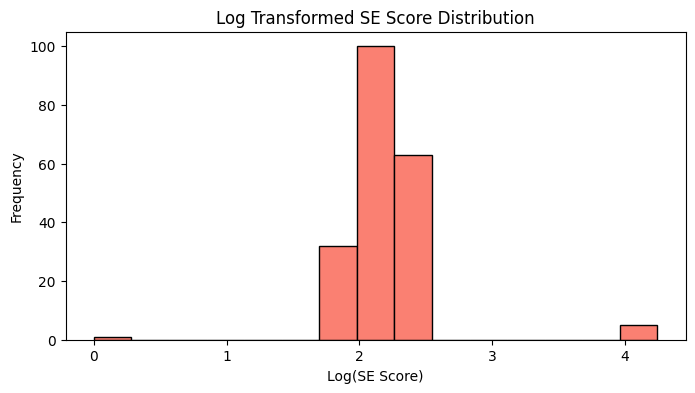

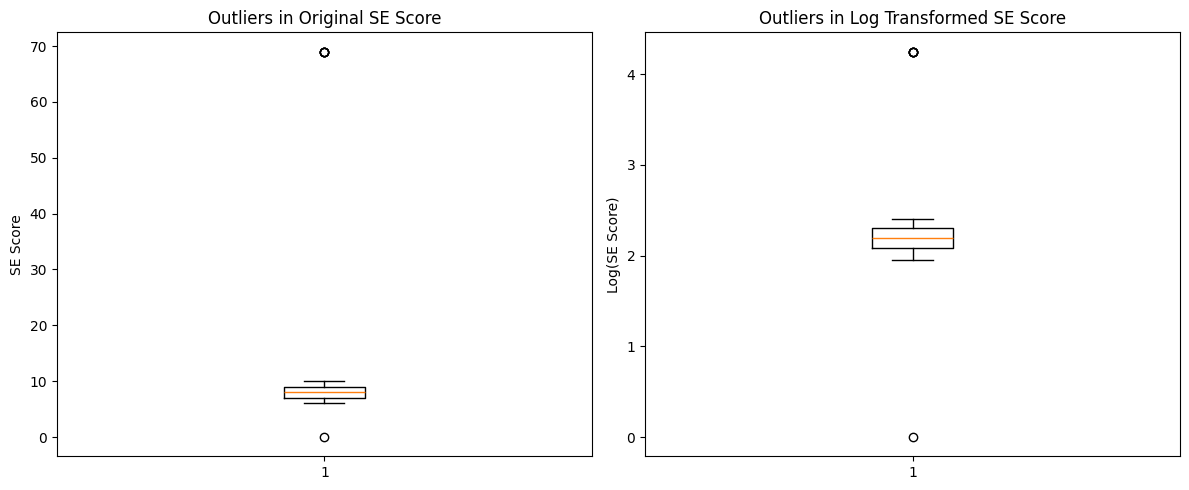

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('dataset.csv')

# Fill missing values
df['FE Score'] = df["FE Score"].fillna(df["FE Score"].mean())
df['SE Score'] = df['SE Score'].fillna(df['SE Score'].median())

# ---------- Original SE Score Distribution ----------
plt.figure(figsize=(8, 4))
plt.hist(df['SE Score'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title("Original SE Score Distribution")
plt.xlabel("SE Score")
plt.ylabel("Frequency")
plt.show()

# ---------- Log Transformation ----------
df['Log_SE_Score'] = df['SE Score'].apply(lambda x: np.log1p(x) if pd.notna(x) else x)

plt.figure(figsize=(8, 4))
plt.hist(df['Log_SE_Score'].dropna(), bins=15, color='salmon', edgecolor='black')
plt.title("Log Transformed SE Score Distribution")
plt.xlabel("Log(SE Score)")
plt.ylabel("Frequency")
plt.show()

# ---------- Outlier Detection Function ----------
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# ---------- Plot Outliers Using Boxplots ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df['SE Score'].dropna())
axes[0].set_title('Outliers in Original SE Score')
axes[0].set_ylabel('SE Score')

axes[1].boxplot(df['Log_SE_Score'].dropna())
axes[1].set_title('Outliers in Log Transformed SE Score')
axes[1].set_ylabel('Log(SE Score)')

plt.tight_layout()
plt.show()
